In [ ]:
!pip install umap-learn

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
import pandas as pd
import time
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = pd.read_csv('/content/drive/MyDrive/DataViz/microbiome.csv')
df = data.fillna(0)

df

,OTU0,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU6686,OTU6687,OTU6688,OTU6689,OTU6690,OTU6691,OTU6692,OTU6693,OTU6694,OTU6695
0,1.558520e-11,4.724120e-11,1.225880e-11,4.515660e-11,2.718290e-11,2.706710e-11,3.306490e-11,5.078730e-11,1.845710e-11,2.565747e-03,...,6.661360e-11,3.021640e-11,4.415210e-11,7.311330e-11,7.772160e-11,4.333640e-11,5.437370e-11,8.723940e-11,2.713500e-11,4.966000e-11
1,2.359220e-11,9.533200e-11,3.330680e-11,2.669130e-11,2.019270e-11,2.505580e-11,6.753770e-11,9.076440e-11,8.707380e-11,2.516360e-04,...,3.255580e-12,5.385290e-11,4.725960e-11,2.600370e-11,4.242660e-11,6.546480e-11,4.848670e-11,8.377660e-11,3.498560e-11,7.617720e-11
2,6.771010e-11,3.682960e-11,8.018540e-11,5.488950e-11,1.341180e-11,5.115210e-11,5.806820e-11,6.466670e-11,1.447080e-11,2.336449e-03,...,7.231020e-11,6.298250e-12,7.062920e-11,8.313000e-11,3.307660e-11,7.383310e-11,4.448790e-11,9.645520e-12,7.880280e-11,3.992640e-11
3,5.520270e-11,9.890760e-11,4.581380e-11,3.539770e-11,2.092110e-11,6.255510e-11,9.341670e-11,5.372400e-11,6.280840e-11,7.410150e-04,...,9.095820e-11,2.935560e-11,9.996590e-11,9.821790e-11,8.541320e-11,9.727770e-11,2.959570e-11,8.581660e-13,5.876120e-11,5.506230e-11
4,5.238120e-11,6.340330e-11,2.354280e-11,7.469650e-11,2.489830e-11,4.048870e-13,3.337430e-11,8.499950e-12,4.558400e-11,4.933400e-04,...,1.504300e-11,4.900990e-11,8.106680e-12,4.669770e-11,8.265580e-11,4.631170e-11,1.600100e-11,5.546980e-11,7.840300e-11,8.564610e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,4.247430e-11,1.406080e-11,9.074520e-11,3.257960e-11,4.646200e-11,4.361780e-11,7.980690e-11,1.049470e-11,3.906600e-11,4.644680e-04,...,5.103970e-11,4.585150e-11,9.281640e-11,1.449490e-11,4.060920e-12,3.054330e-11,7.129660e-11,9.447730e-11,9.238750e-11,9.595700e-11
671,1.034810e-11,1.621610e-11,2.990730e-11,5.520300e-12,2.976330e-11,2.250610e-11,6.362920e-11,8.706380e-11,1.573750e-11,9.016790e-11,...,2.155730e-11,5.992650e-11,6.944240e-11,8.926880e-13,3.493360e-11,9.504000e-11,7.293740e-12,5.148570e-11,6.420540e-11,6.783460e-11
672,3.440020e-11,9.718630e-11,1.379340e-11,1.248030e-11,1.572270e-11,5.661180e-13,5.494880e-11,5.007510e-04,8.707440e-11,7.840980e-11,...,7.605120e-12,5.094710e-11,1.178910e-11,4.806800e-11,3.732460e-11,5.721140e-12,8.027560e-11,4.168250e-11,2.579660e-11,5.988800e-11
673,5.155480e-11,8.816020e-11,4.396740e-11,2.091220e-13,2.292420e-11,9.814320e-11,2.528750e-12,8.308330e-11,4.793430e-11,7.744790e-11,...,1.173670e-11,8.479930e-11,5.295780e-11,3.520920e-11,5.199940e-11,8.510810e-11,5.678910e-11,5.082900e-11,9.205800e-11,9.932160e-12


Cerco se ci sono colonne non numeriche

In [10]:
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

Non ci sono!

100%|██████████| 4/4 [01:12<00:00, 18.22s/it]


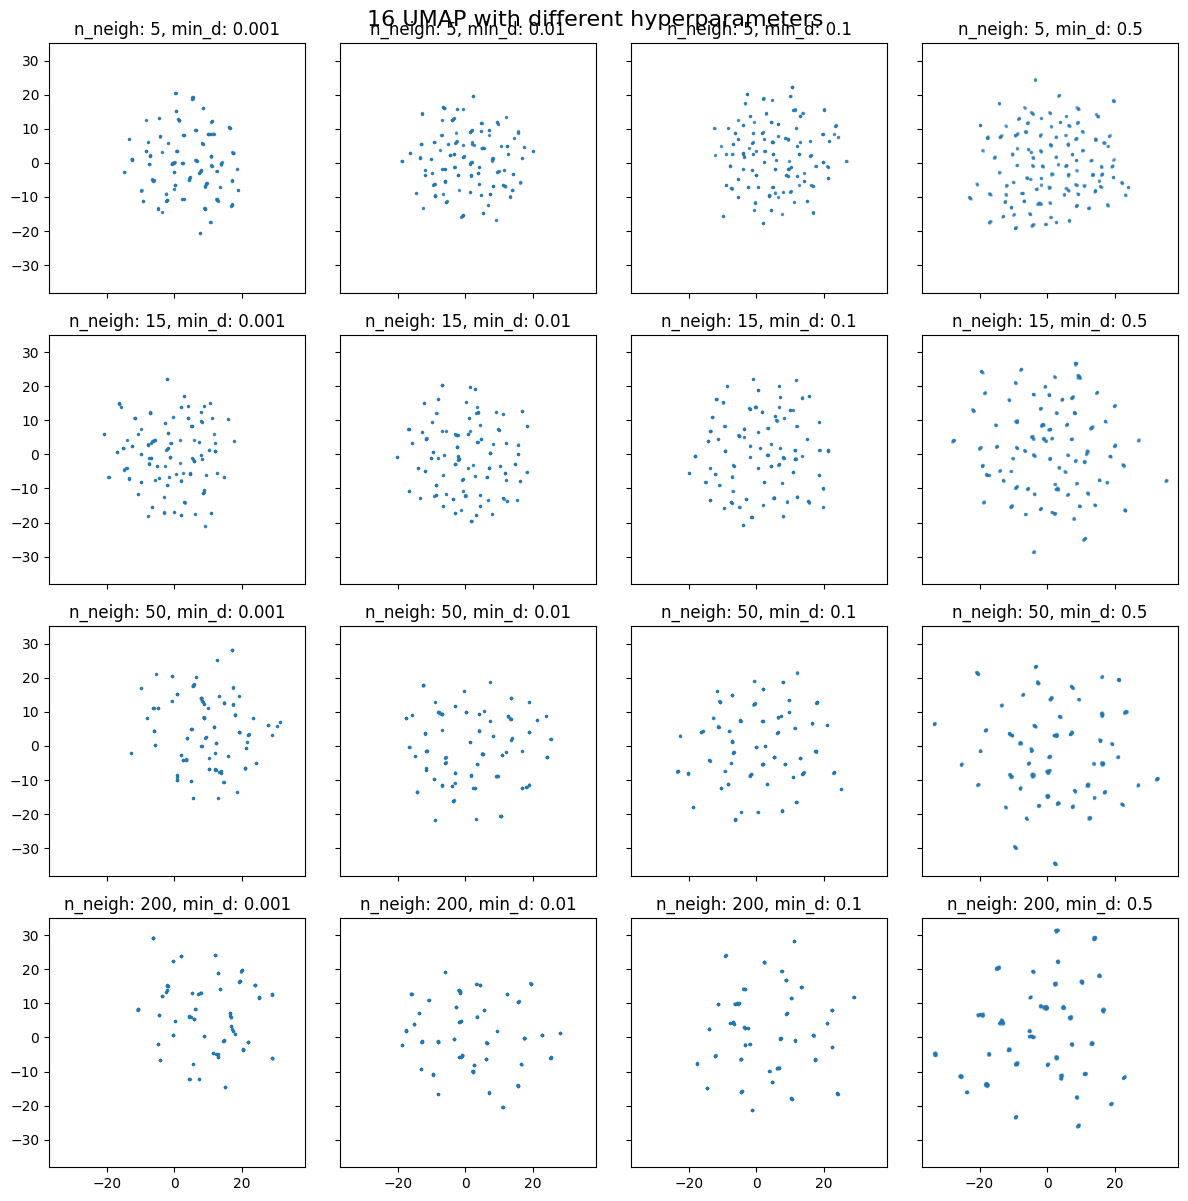

In [23]:
from tqdm import tqdm

# Initialize hyperparameters for UMAP
n_neighbors_list = [5, 15, 50, 200]
min_dist_list = [0.001, 0.01, 0.1, 0.5]    # total of 16 plots

# Create Figure and Subplots
fig, axes = plt.subplots(4,4, figsize=(12,12), sharex=True, sharey=True, dpi=100)

axes_idx_rows = 0
axes_idx_cols = 0

easy_axes = axes.ravel()
axes_idx = 0


for n_neigh in tqdm(n_neighbors_list):
    for min_d in min_dist_list:

        # Reset the df
        df_for_dr = df

        # Compute UMAP
        trans = umap.UMAP(n_neighbors=n_neigh, min_dist=min_d, random_state=14).fit(df_for_dr)

        # Add labels
        df_for_dr['umap-one'] = trans.embedding_[:, 0]
        df_for_dr['umap-two'] = trans.embedding_[:, 1]
        #df_for_dr['y'] = y_labels
        #df_for_dr['y_lab'] = df_for_dr['y'].rank(method='dense', ascending=False).astype(int)

        easy_axes[axes_idx].scatter(
            df_for_dr['umap-one'], df_for_dr['umap-two'], 
            s=2, alpha=0.25, 
            #c=df_for_dr['y_lab'],
            #cmap=matplotlib.colors.ListedColormap(colors)
            )
        easy_axes[axes_idx].set_title('n_neigh: ' + str(n_neigh) + ', min_d: ' + str(min_d))

        axes_idx += 1

# General title for entire plot (we use plt)
plt.suptitle('16 UMAP with different hyperparameters', 
             verticalalignment='bottom', fontsize=16)

plt.tight_layout()
plt.show()